
<table>
<tr>
<td width=15%><img src="./img/UGA.png"></img></td>
<td><center><h1>Python Tutorial</h1></center></td>
<td width=15%><a href="http://www.iutzeler.org" style="font-size: 16px; font-weight: bold">Franck Iutzeler</a><br/> Fall. 2018 </td>
</tr>
</table>


<br/><br/><div id="top"></div>

<center><a style="font-size: 40pt; font-weight: bold">Data Handling with Pandas </a></center>

<br/>

# ``1. Pandas formats``

---

<a href="#style"><b>Package check and Styling</b></a><br/><br/><b>Outline</b><br/><br/>
&nbsp;&nbsp;&nbsp; a) <a href="#introSer"> Pandas Series</a><br/>&nbsp;&nbsp;&nbsp; b) <a href="#introData"> Pandas DataFrames</a><br/>&nbsp;&nbsp;&nbsp; c) <a href="#introIndex"> Indexing</a><br/>


Let us take a look at the data structures provided by the **Pandas** library.

Pandas is a newer package built on top of NumPy which provides an efficient implementation of **DataFrames**. DataFrames are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data. As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations. The DataFrame type and processing comes from the **R** language, familiar to statisticians. Conveniently, Pandas DataFrames benefit from fancy printing in Jupyter notebooks.

Just as we generally import NumPy under the alias ``np``, we will import Pandas under the alias ``pd``.

In [1]:
import pandas as pd
import numpy as np

## <a id="introSer"> a) Pandas Series</a>  <p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>


A Pandas ``Series`` is a one-dimensional array of indexed data.

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

The contents can be accessed in the same way as for NumPy arrays, to the difference that when more than one value is selected, the type remains a Pandas ``Series``.

In [3]:
print(data[0],type(data[0]))

0.25 <class 'numpy.float64'>


In [4]:
print(data[2:],type(data[2:]))

2    0.75
3    1.00
dtype: float64 <class 'pandas.core.series.Series'>


The type ``Series`` wraps both a sequence of values and a sequence of indices, which we can access with the <tt>values</tt> and <tt>index</tt> attributes.

* ``values`` are the contents of the series as a NumPy array

In [5]:
print(data.values,type(data.values))

[ 0.25  0.5   0.75  1.  ] <class 'numpy.ndarray'>


* ``index`` are the indices of the series

In [6]:
print(data.index,type(data.index))

RangeIndex(start=0, stop=4, step=1) <class 'pandas.core.indexes.range.RangeIndex'>


### Series Indices

The main difference between NumPy arrays and Pandas Series is the presence of this <tt>index</tt> field. By default, it is set (as in NumPy arrays) as <tt>0,1,..,size_of_the_series</tt> but a Series index can be explicitly defined. The indices may be numbers but also strings. Then, the contents of the series *have to* be accessed using these defined indices.

In [7]:
named_data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
print(named_data)

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64


In [8]:
print(named_data['c'])

0.75


*Warning:* Things can get strange...

In [9]:
print(named_data[0])

0.25


and even stranger...

In [10]:
data_S = pd.Series([0.25, 0.5, 0.75, 1.0], index=[1, 3, 4, 2])
print(data_S)

1    0.25
3    0.50
4    0.75
2    1.00
dtype: float64


In [11]:
print(data_S[2])

1.0


### Series and Python Dictionaries [\*] 

Pandas Series and Python Dictionaries are close semantically: mappping keys to values. However, the implementation of Pandas series is usually more efficient than dictionaries in the context of data science. Naturally, Series can be contructed from dictionaries.

In [12]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
print(population_dict,type(population_dict))
print(population,type(population))

{'New York': 19651127, 'Texas': 26448193, 'Florida': 19552860, 'Illinois': 12882135, 'California': 38332521} <class 'dict'>
California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64 <class 'pandas.core.series.Series'>


In [13]:
population['California']

38332521

In [14]:
population['California':'Illinois']

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64

## <a id="introData"> b) Pandas DataFrames</a>
<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>

DataFrames is *the* fundamental object of Pandas. 


Dataframes can be seen as an array of Series: to each <tt>index</tt> (corresponding to an individual for instance or a line in a table), a Dataframe maps multiples values; these values corresponds to the <tt>columns</tt> of the DataFrame which each have a name (as a string).   


In the following example, we will construct a Dataframe from two Series with common indices. 

In [15]:
area = pd.Series( {'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995})
population = pd.Series({'California': 38332521, 'Texas': 26448193, 'New York': 19651127, 'Florida': 19552860, 'Illinois': 12882135})

In [16]:
states = pd.DataFrame({'Population': population, 'Area': area})
print(states,type(states))

              Area  Population
California  423967    38332521
Florida     170312    19552860
Illinois    149995    12882135
New York    141297    19651127
Texas       695662    26448193 <class 'pandas.core.frame.DataFrame'>


In Jupyter notebooks, DataFrames are displayed in a fancier way when the name of the dataframe is typed (instead of using <tt>print</tt>)

In [17]:
states

,Area,Population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


DataFrames have 
* <tt>index</tt> that are the defined indices as in Series
* <tt>columns</tt> that are the columns names
* <tt>values</tt> that return a (2D) NumPy array with the contents

In [18]:
print(states.index)
print(states.columns)
print(states.values,type(states.values),states.values.shape)

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')
Index(['Area', 'Population'], dtype='object')
[[  423967 38332521]
 [  170312 19552860]
 [  149995 12882135]
 [  141297 19651127]
 [  695662 26448193]] <class 'numpy.ndarray'> (5, 2)


<div class="warn"> **Warning:**  When accessing a Dataframe, <tt>dataframe_name[column_name]</tt> return the corresponding column as a Series. <tt>dataframe_name[index_name]</tt> returns an error! We will see later how to access a specific index. </div>

In [19]:
print(states['Area'],type(states['Area']))

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: Area, dtype: int64 <class 'pandas.core.series.Series'>


In [20]:
import traceback

try:
    print(states['California'])
except Exception as e:
    traceback.print_exc()

Traceback (most recent call last):
  File "/usr/local/lib/python3.4/dist-packages/pandas/core/indexes/base.py", line 2442, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 132, in pandas._libs.index.IndexEngine.get_loc (pandas/_libs/index.c:5280)
  File "pandas/_libs/index.pyx", line 154, in pandas._libs.index.IndexEngine.get_loc (pandas/_libs/index.c:5126)
  File "pandas/_libs/hashtable_class_helper.pxi", line 1210, in pandas._libs.hashtable.PyObjectHashTable.get_item (pandas/_libs/hashtable.c:20523)
  File "pandas/_libs/hashtable_class_helper.pxi", line 1218, in pandas._libs.hashtable.PyObjectHashTable.get_item (pandas/_libs/hashtable.c:20477)
KeyError: 'California'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<ipython-input-20-27407c99b036>", line 4, in <module>
    print(states['California'])
  File "/usr/local/lib/python3.4/dist-packages/pandas/core/frame.py", line 1964, in __g

### Dataframe creation

To create DataFrames, the main methods are:
* from Series (as above)

In [21]:
print(population,type(population))
states = pd.DataFrame({'Population': population, 'Area': area})
states

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64 <class 'pandas.core.series.Series'>


,Area,Population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


* from NumPy arrays (the columns and indices are taken as the array's ones)

In [22]:
A = np.random.randn(5,3)
print(A,type(A))
dfA = pd.DataFrame(A)
dfA

[[-1.99296009 -0.52976714  0.18132795]
 [ 0.97902145  0.94681138  0.13305112]
 [-0.20752365  0.99811819  1.84557225]
 [ 0.55518781 -0.83672091  0.40328359]
 [-0.70587689  0.46613281 -0.02785679]] <class 'numpy.ndarray'>


,0,1,2
0,-1.992960,-0.529767,0.181328
1,0.979021,0.946811,0.133051
2,-0.207524,0.998118,1.845572
3,0.555188,-0.836721,0.403284
4,-0.705877,0.466133,-0.027857


* from a *list* of *dictionaries*. Be careful, each element of the list is an example (corresponding to an automatic index 0,1,...) while each key of the dictonary corresponds to a column.

In [23]:
data = [{'a': i, 'b': 2 * i} for i in range(3)]
print(data,type(data))

[{'b': 0, 'a': 0}, {'b': 2, 'a': 1}, {'b': 4, 'a': 2}] <class 'list'>


In [24]:
df = pd.DataFrame(data)
df

,a,b
0,0,0
1,1,2
2,2,4


* from a *file* , typically a <tt>csv</tt> file (for comma separated values), eventually with the names of the columns as a first line.


    col_1_name,col_2_name,col_3_name
    col_1_v1,col_2_v1,col_3_v1
    col_1_v2,col_2_v2,col_3_v2
    ...
    
For other files types (MS Excel, libSVM, any other separator) see this [part of the doc](https://pandas.pydata.org/pandas-docs/stable/api.html#input-output)

In [25]:
!head -4 data/president_heights.csv # Jupyter bash command to see the first 4 lines of the file

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [26]:
data = pd.read_csv('data/president_heights.csv')
data

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


### Names and Values

Notice there can be missing values in DataFrames.

In [27]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


You can set indices and columns names *a posteriori*

In [28]:
dfA.columns = ['a','b','c']
dfA.index = [i**2 for i in range(1,6)  ]
dfA

,a,b,c
1,-1.992960,-0.529767,0.181328
4,0.979021,0.946811,0.133051
9,-0.207524,0.998118,1.845572
16,0.555188,-0.836721,0.403284
25,-0.705877,0.466133,-0.027857


Actually, the type of the columns and index fields are Pandas Index type that gives some extra methods

In [29]:
type(dfA.index)

pandas.core.indexes.numeric.Int64Index

In [30]:
dfA.index.is_monotonic_increasing

True

In [31]:
dfA.index.inferred_type

'integer'

In [32]:
dfA.columns.inferred_type

'string'

In [33]:
dfA.columns.is_unique

True

## <a id="introIndex"> c) Indexing</a> 
<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>




In [34]:
area = pd.Series( {'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995})
population = pd.Series({'California': 38332521, 'Texas': 26448193, 'New York': 19651127, 'Florida': 19552860, 'Illinois': 12882135})
states = pd.DataFrame({'Population': population, 'Area': area})
states

,Area,Population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


You may access columns directly with names, *then* you can access individuals with their index (as their are series). 

In [35]:
states['Area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: Area, dtype: int64

In [36]:
states['Area']['Texas']

695662

To ease the access, Pandas offers dedicated methods:
* <tt>iloc</tt> enables to access subparts of the dataframe as if it was a NumPy array.

In [37]:
states.iloc[:2]

,Area,Population
California,423967,38332521
Florida,170312,19552860


In [38]:
states.iloc[:2,0]

California    423967
Florida       170312
Name: Area, dtype: int64

* <tt>loc</tt> does the same but with the explicit names (the last one is included)

In [39]:
states.loc[['California','Florida']]

,Area,Population
California,423967,38332521
Florida,170312,19552860


In [40]:
states.loc[:'New York']

,Area,Population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127


In [41]:
states.loc[:,'Population':]

,Population
California,38332521
Florida,19552860
Illinois,12882135
New York,19651127
Texas,26448193


<br/><br/>


# ``2.  Operations on Dataframes``

---

><b>Outline</b><br/><br/>
&nbsp;&nbsp;&nbsp; a) <a href="#dataOp"> Operations</a><br/>&nbsp;&nbsp;&nbsp; b) <a href="#dataApp"> Appending, Concatenating, and Merging</a><br/>&nbsp;&nbsp;&nbsp; c) <a href="#dataPre"> Preparing the Data</a><br/>&nbsp;&nbsp;&nbsp; d) <a href="#dataBase"> Basic Statistics </a><br/>&nbsp;&nbsp;&nbsp; e) <a href="#dataGroup"> GroupBy <br/>

## <a id="dataOp"> a) Operations</a> 

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>

In [42]:
import numpy as np
import pandas as pd

### Numpy operations


If we apply a NumPy function on a Pandas datframe, the result will be another Pandas dataframe with the indices preserved.

In [43]:
df = pd.DataFrame(np.random.randint(0, 10, (3, 4)), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,2,3,9,1
1,2,7,0,3
2,1,2,0,9


In [44]:
np.cos(df * np.pi/2 ) - 1

,A,B,C,D
0,-2.0,-1.0,-1.0,-1.0
1,-2.0,-1.0,0.0,-1.0
2,-1.0,-2.0,0.0,-1.0


### Arithmetic operations

Arithmetic operations can also be performed either with <tt>+ - / *</tt> or with dedicated <tt>add multiply</tt> etc methods

In [45]:
A = pd.DataFrame(np.random.randint(0, 20, (2, 2)), columns=list('AB'))
A

,A,B
0,16,2
1,6,14


In [46]:
B = pd.DataFrame(np.random.randint(0, 10, (3, 3)), columns=list('BAC'))
B

,B,A,C
0,0,2,9
1,3,2,7
2,8,7,3


In [47]:
A+B

,A,B,C
0,18.0,2.0,NaN
1,8.0,17.0,NaN
2,NaN,NaN,NaN


The pandas arithmetic functions also have an option to fill missing values by replacing the missing one in either of the dataframes by some value.

In [48]:
A.add(B, fill_value=0.0)

,A,B,C
0,18.0,2.0,9.0
1,8.0,17.0,7.0
2,7.0,8.0,3.0


## <a id="dataApp"> b) Appending, Concatenating, and Merging</a> 

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>


Thanks to naming, dataframes can be easily added, merged, etc. However, if some entries are missing (columns or indices), the operations may get complicated. Here the most standard situations are covered, take a look at the documentation (notably [this one on merging, appending, and concatenating](https://pandas.pydata.org/pandas-docs/stable/merging.html) )

* **Appending** is for adding the lines of one dataframe with another one with the same columns.

In [49]:
A = pd.DataFrame(np.random.randint(0, 20, (2, 2)), columns=list('AB'))
A2 = pd.DataFrame(np.random.randint(0, 20, (3, 2)), columns=list('AB'))

In [50]:
A

,A,B
0,12,12
1,18,4


In [51]:
A2

,A,B
0,17,0
1,0,11
2,6,12


In [52]:
A.append(A2) # this does not "append to A" but creates a new dataframe

,A,B
0,12,12
1,18,4
0,17,0
1,0,11
2,6,12


Sometimes, indexes do not matter, they can be resetted using <tt>ignore_index=True</tt>. 

In [53]:
A.append(A2,ignore_index=True)

,A,B
0,12,12
1,18,4
2,17,0
3,0,11
4,6,12


This can still be done afterwards

In [54]:
AA = A.append(A2) 

In [55]:
AA.index.is_unique

False

In [56]:
AA.reset_index(drop=True,inplace=True)

In [57]:
AA.index.is_unique

True

In [58]:
AA

,A,B
0,12,12
1,18,4
2,17,0
3,0,11
4,6,12


* **Concatenating** is for adding lines and/or columns of multiples datasets (it is a generalization of appending)

In [59]:
A = pd.DataFrame(np.random.randint(0, 20, (2, 2)), columns=list('AB'))
A2 = pd.DataFrame(np.random.randint(0, 20, (3, 2)), columns=list('AB'))
A3 = pd.DataFrame(np.random.randint(0, 20, (1, 3)), columns=list('CAD'))

In [60]:
A

,A,B
0,10,19
1,4,0


In [61]:
A2

,A,B
0,15,7
1,11,5
2,9,16


In [62]:
A3

,C,A,D
0,14,8,8


The most important settings of the <tt>concat</tt> function are <tt>pd.concat(objs, axis=0, join='outer',ignore_index=False)</tt> where <br/>
. *objs* is the list of dataframes to concatenate <br/>
. *axis* is the axis on which to concatenate 0 (default) for the lines and 1 for the columns <br/>
. *join* is to decide if we keep all columns/indices on the other axis ('outer' ,default), or the intersection ( 'inner') <br/>
. *ignore_index* is to decide is we keep the previous names (False, default) or give new ones (True)


For a detailed view see  [this doc on merging, appending, and concatenating](https://pandas.pydata.org/pandas-docs/stable/merging.html)

In [63]:
pd.concat([A,A2,A3],ignore_index=True)

,A,B,C,D
0,10,19.0,NaN,NaN
1,4,0.0,NaN,NaN
2,15,7.0,NaN,NaN
3,11,5.0,NaN,NaN
4,9,16.0,NaN,NaN
5,8,NaN,14.0,8.0


In [64]:
pd.concat([A,A2,A3],axis=1)

,A,B,A,B,C,A,D
0,10.0,19.0,15,7,14.0,8.0,8.0
1,4.0,0.0,11,5,NaN,NaN,NaN
2,NaN,NaN,9,16,NaN,NaN,NaN


In [65]:
pd.concat([A,A2,A3],axis=1,ignore_index=True,join='inner')

,0,1,2,3,4,5,6
0,10,19,15,7,14,8,8


* **Merging** is for putting together two dataframes with *hopefully* common data


For a detailed view see  [this doc on merging, appending, and concatenating](https://pandas.pydata.org/pandas-docs/stable/merging.html)

In [66]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [67]:
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [68]:
df3 = pd.merge(df1,df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [69]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [70]:
pd.merge(df3,df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


## <a id="dataPre"> c) Preparing the Data</a> 

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>


Before exploring the data, it is primordial to verify its soundness, indeed if it has missing or replicated data, the results of our test may not be accurate. Pandas provides a collection of methodes to verify the sanity of the data (recall that when data is missing for an entry, it is noted as <tt>NaN</tt>, and thus any further operation including this will be <tt>NaN</tt>). 


To explore some typical problems in a dataset, I messed with a small part of the [*MovieLens*](https://grouplens.org/datasets/movielens/) dataset. The <tt>ratings_mess.csv</tt> file contains 4 columns:
* <tt>userId</tt> id of the user, integer greater than 1 
* <tt>movieId</tt>  id of the user, integer greater than 1 
* <tt>rating</tt> rating of the user to the movie, float between 0.0 and 5.0  
* <tt>timestamp</tt> timestamp, integer 

and features (man-made!) errors, some of them minor some of them major.



In [71]:
ratings = pd.read_csv('data/ml-small/ratings_mess.csv')
ratings.head(7) # enables to display the top n lines of a dataframe, 5 by default

,userId,movieId,rating,timestamp
0,1.0,31.0,2.5,1.260759e+09
1,1.0,1029.0,3.0,1.260759e+09
2,2.0,10.0,4.0,NaN
3,2.0,52.0,83.0,8.353560e+08
4,NaN,62.0,3.0,8.353557e+08
5,2.0,144.0,NaN,8.353560e+08
6,0.0,616.0,3.0,8.353559e+08


### Missing values


Pandas provides functions that check if the values are missing:

* ``isnull()``: Generate a boolean mask indicating missing values
* ``notnull()``: Opposite of ``isnull()``


In [72]:
ratings.isnull().head(5)

,userId,movieId,rating,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,True
3,False,False,False,False
4,True,False,False,False


#### Carefully pruning data

Now that we have to prune lines of our data, this will be done using ``dropna()`` through <tt>dataframe.dropna(subset=["col_1","col_2"],inplace=True)</tt> which drops all rows with at least one missing value in the columns <tt>col1, col2</tt> of <tt>dataframe</tt> *in place* that is without copy.


<div class="warn"> <b>Warning:</b> this function deletes any line with at least **one** missing data, which is not always wishable. Also, with *inplace=True*, it is applied in place, meaning that they modify the dataframe it is applied to, it is thus an **irreversible operation**; drop *inplace=True* to create a copy or see the result before apllying it.</div>

For instance here, <tt>userId,movieId,rating</tt> are essential whereas the <tt>timestamp</tt> is not (it can be dropped for the prediciton process). Thus, we will delete the lines where one of <tt>userId,movieId,rating</tt> is missing and fill the <tt>timestamp</tt> with 0 when it is missing.

In [73]:
ratings.dropna(subset=["userId","movieId","rating"],inplace=True)
ratings.head(5)

,userId,movieId,rating,timestamp
0,1.0,31.0,2.5,1.260759e+09
1,1.0,1029.0,3.0,1.260759e+09
2,2.0,10.0,4.0,NaN
3,2.0,52.0,83.0,8.353560e+08
6,0.0,616.0,3.0,8.353559e+08


To fill missing data (from a certain column), the recommended way is to use ``fillna()`` through <tt>dataframe["col"].fillna(value,inplace=True)</tt> which replace all missing values in the column <tt>col</tt> of <tt>dataframe</tt> by <tt>value</tt> *in place* that is without copy (again this is irreversible, to use the copy version use inplace=False).


In [74]:
ratings["timestamp"].fillna(0,inplace=True)
ratings.head(7)

,userId,movieId,rating,timestamp
0,1.0,31.0,2.5,1.260759e+09
1,1.0,1029.0,3.0,1.260759e+09
2,2.0,10.0,4.0,0.000000e+00
3,2.0,52.0,83.0,8.353560e+08
6,0.0,616.0,3.0,8.353559e+08
8,2.0,720.0,4.0,8.353560e+08
9,3.0,60.0,3.0,1.298862e+09


This indeed gives the correct result, however, the line indexing presents missing number. The indexes can be resetted with  <tt>reset_index(inplace=True,drop=True)</tt>

In [75]:
ratings.reset_index(inplace=True,drop=True)
ratings.head(7)

,userId,movieId,rating,timestamp
0,1.0,31.0,2.5,1.260759e+09
1,1.0,1029.0,3.0,1.260759e+09
2,2.0,10.0,4.0,0.000000e+00
3,2.0,52.0,83.0,8.353560e+08
4,0.0,616.0,3.0,8.353559e+08
5,2.0,720.0,4.0,8.353560e+08
6,3.0,60.0,3.0,1.298862e+09


### Improper values

Even without the missing values, some lines are problematic as they feature values outside of prescribed range (<tt>userId</tt> id of the user, integer greater than 1; <tt>movieId</tt>  id of the user, integer greater than 1; <tt>rating</tt> rating of the user to the movie, float between 0.0 and 5.0; <tt>timestamp</tt> timestamp, integer ) 


In [76]:
ratings[ratings["userId"]<1]  # Identifying a problem

,userId,movieId,rating,timestamp
4,0.0,616.0,3.0,835355932.0


Now, we drop the corresponding line, with ``drop`` by <tt>drop(problematic_row.index, inplace=True)</tt>. 

<div class="warn"> **Warning:** Do not forget <tt>.index</tt> and <tt>inplace=True</tt></div>

In [77]:
ratings.drop(ratings[ratings["userId"]<1].index, inplace=True)
ratings.head(7)

,userId,movieId,rating,timestamp
0,1.0,31.0,2.5,1.260759e+09
1,1.0,1029.0,3.0,1.260759e+09
2,2.0,10.0,4.0,0.000000e+00
3,2.0,52.0,83.0,8.353560e+08
5,2.0,720.0,4.0,8.353560e+08
6,3.0,60.0,3.0,1.298862e+09
7,3.0,110.0,4.0,1.298922e+09


In [78]:
pb_rows = ratings[ratings["movieId"]<1]
pb_rows

,userId,movieId,rating,timestamp
12,3.0,0.0,3.0,1.298924e+09
24,4.0,-1.0,2.0,9.499822e+08


In [79]:
ratings.drop(pb_rows.index, inplace=True)

And finally the ratings.

In [80]:
pb_rows = ratings[ratings["rating"]<0]
pb_rows2 = ratings[ratings["rating"]>5]
tot_pb_rows = pb_rows.append(pb_rows2 )
tot_pb_rows

,userId,movieId,rating,timestamp
15,3.0,2858.0,-4.0,1.298922e+09
3,2.0,52.0,83.0,8.353560e+08
25,5.0,3176.0,123.5,1.163374e+09
29,6.0,111.0,6.0,1.109258e+09


In [81]:
ratings.drop(tot_pb_rows.index, inplace=True)
ratings.reset_index(inplace=True,drop=True)

We finally have our dataset cured! Let us save it for further use.

<tt>to_csv</tt> saves as CSV into some file, <tt>index=False</tt> drops the index names as we did not specify it.

In [82]:
ratings.to_csv("data/ml-small/ratings_cured.csv",index=False)

## <a id="dataBase"> d) Basic Statistics </a> 

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>

With our cured dataset, we can begin exploring.

In [83]:
ratings = pd.read_csv('data/ml-small/ratings_cured.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1.0,31.0,2.5,1.260759e+09
1,1.0,1029.0,3.0,1.260759e+09
2,2.0,10.0,4.0,0.000000e+00
3,2.0,720.0,4.0,8.353560e+08
4,3.0,60.0,3.0,1.298862e+09


The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects, and ``description`` also provides a quick overview.

In [84]:
ratings.describe()

,userId,movieId,rating,timestamp
count,24.000000,24.000000,24.000000,2.400000e+01
mean,3.416667,2465.916667,4.020833,1.056019e+09
std,1.212854,6171.507686,0.926414,3.610777e+08
min,1.000000,10.000000,2.000000,0.000000e+00
25%,3.000000,213.250000,3.375000,9.498962e+08
50%,3.000000,1028.500000,4.000000,1.163375e+09
75%,4.000000,1628.000000,5.000000,1.298862e+09
max,6.000000,30749.000000,5.000000,1.298923e+09


We see that these statistics do not make sense for all rows. Let us drop the timestamp and examine the ratings.

In [85]:
ratings.drop("timestamp",axis=1,inplace=True)
ratings.head()

,userId,movieId,rating
0,1.0,31.0,2.5
1,1.0,1029.0,3.0
2,2.0,10.0,4.0
3,2.0,720.0,4.0
4,3.0,60.0,3.0


In [86]:
ratings["rating"].describe()

count    24.000000
mean      4.020833
std       0.926414
min       2.000000
25%       3.375000
50%       4.000000
75%       5.000000
max       5.000000
Name: rating, dtype: float64

## <a id="dataGroup"> e) GroupBy </a> 

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>

These ratings are linked to users and movies, in order to have a separate view per user/movie, *grouping* has to be used.

The ``GroupBy`` operation (that comes from SQL) accomplishes:

- The *split* step involves breaking up and grouping a ``DataFrame`` depending on the value of the specified key.
- The *apply* step involves computing some function, usually an sum, median, means etc *within the individual groups*.
- The *combine* step merges the results of these operations into an output array.

<img src="img/GroupBy.png">
<p style="text-align: right">Source: [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas</p>

In [87]:
ratings.head()

,userId,movieId,rating
0,1.0,31.0,2.5
1,1.0,1029.0,3.0
2,2.0,10.0,4.0
3,2.0,720.0,4.0
4,3.0,60.0,3.0


So to get the mean of the ratings per user, the command is

In [88]:
ratings.groupby("userId")["rating"].mean()

userId
1.0    2.750000
2.0    4.000000
3.0    3.444444
4.0    5.000000
5.0    4.166667
6.0    4.500000
Name: rating, dtype: float64

### Filtering

Filtering is the action of deleting rows depending on a boolean function. For instance, the following removes the user with a rating of only one movie.

In [89]:
ratings.groupby("userId")["rating"].count()

userId
1.0    2
2.0    2
3.0    9
4.0    7
5.0    3
6.0    1
Name: rating, dtype: int64

In [90]:
def filter_func(x):
    return x["rating"].count() >= 2

filtered = ratings.groupby("userId").filter(filter_func)
filtered

,userId,movieId,rating
0,1.0,31.0,2.5
1,1.0,1029.0,3.0
2,2.0,10.0,4.0
3,2.0,720.0,4.0
4,3.0,60.0,3.0
5,3.0,110.0,4.0
6,3.0,247.0,3.5
7,3.0,592.0,3.0
8,3.0,593.0,3.0
9,3.0,595.0,2.0


In [91]:
filtered.groupby("userId")["rating"].count()

userId
1.0    2
2.0    2
3.0    9
4.0    7
5.0    3
Name: rating, dtype: int64

### Transformations

Transforming is the actions of applying a transformation (sic).

For instance, let us normalize the ratings so that they have zero mean for each user.

In [92]:
ratings.groupby("userId")["rating"].mean()

userId
1.0    2.750000
2.0    4.000000
3.0    3.444444
4.0    5.000000
5.0    4.166667
6.0    4.500000
Name: rating, dtype: float64

In [93]:
def center_ratings(x):
    x["rating"] = x["rating"] - x["rating"].mean()
    return x

centered = ratings.groupby("userId").apply(center_ratings)

In [94]:
centered.groupby("userId")["rating"].mean()

userId
1.0    0.000000e+00
2.0    0.000000e+00
3.0   -1.973730e-16
4.0    0.000000e+00
5.0   -2.960595e-16
6.0    0.000000e+00
Name: rating, dtype: float64

#### Another method using lambda calculus [*]

In [95]:
centered = pd.DataFrame(ratings)
centered["rating"] = centered.groupby("userId")["rating"].transform(lambda x:x-x.mean())

### Aggregations [*]

Aggregations let you aggreagate several operations.

In [96]:
ratings.groupby("userId")["rating"].aggregate([min,max,np.mean,np.median,len])

,min,max,mean,median,len
userId,,,,,
1.0,-0.250000,0.250000,0.000000e+00,0.000000,2.0
2.0,0.000000,0.000000,0.000000e+00,0.000000,2.0
3.0,-1.444444,1.555556,-1.973730e-16,0.055556,9.0
4.0,0.000000,0.000000,0.000000e+00,0.000000,7.0
5.0,-0.666667,0.333333,-2.960595e-16,0.333333,3.0
6.0,0.000000,0.000000,0.000000e+00,0.000000,1.0


<br/><br/>


# ``3.  Pandas in Practice``

---

Pandas enables concise and powerful data manipulation and is well integrated in the Data Science environment but beware of some caveats.

<img width="50%" src="./img/new_prog.jpg"></img>

<b>Outline</b><br/><br/>
&nbsp;&nbsp;&nbsp; a) <a href="#praSK">  Machine Learning with Scikit Learn and Pandas </a><br/>
&nbsp;&nbsp;&nbsp; b) <a href="#praMis">  Common problems</a><br/>
&nbsp;&nbsp;&nbsp; c) <a href="#praCla">  ML with missing values </a>

## <a id="praSK"> a) Machine Learning with Scikit Learn and Pandas </a> 

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>

We will consider the <a href="http://archive.ics.uci.edu/ml/datasets/Student+Performance">student performance</a> dataset. The goal is to predict if the student will pass (i.e. the final grade is greater than 12) from the other information, we get from the documentation:

Let us read the data from the csv

In [97]:
import pandas as pd
import numpy as np

student = pd.read_csv('data/student-mat.csv')
student.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,2,2,0,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,1,2,0,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,1,2,3,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,1,3,0,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,1,2,0,...,4,3,2,1,2,5,4,6,10,10


In [98]:
target = pd.DataFrame(student["G3"])
features = student.drop(["G3"],axis=1)

To practice DataFrame operations, we first look at the values of the target and features and investigate basic transformations.

### Target

Let us use Pandas's <tt>applymap</tt> function to transform the target from numerical notes to +1 (pass, note >= 12) and -1 (fail, note < 12).<br/>
<i>Hint: create a function return +1 if the input is >= 12 and -1 elsewhere first and apply this function using <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html">applymap</a>.</i>

In [99]:
target.head(4)

,G3
0,6
1,6
2,10
3,15


In [100]:
def to_class(x):
    if x>=12:
        return +1
    else:
        return -1

target_classes = target.applymap(to_class)

In [101]:
target_classes.head(4)

,G3
0,-1
1,-1
2,-1
3,1


### Features

In [102]:
features.groupby("sex")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,208.0,16.730769,1.201696,15.0,16.0,17.0,18.0,20.0
M,187.0,16.657754,1.356181,15.0,16.0,16.0,18.0,22.0


In [103]:
features.groupby(["sex","age"])["G2"].describe()

count       mean       std   min    25%   50%    75%   max
sex age                                                            
F   15    38.0   9.789474  4.140492   0.0   8.00  10.0  12.75  17.0
    16    54.0  10.722222  3.182598   0.0   9.00  10.5  13.00  16.0
    17    58.0  10.879310  3.509774   5.0   9.00  11.0  13.75  18.0
    18    43.0   9.976744  4.200274   0.0   8.00  10.0  12.00  18.0
    19    14.0   9.714286  2.334641   5.0   8.25   9.5  11.75  13.0
    20     1.0  14.000000       NaN  14.0  14.00  14.0  14.00  14.0
M   15    44.0  12.727273  3.643175   0.0  10.00  13.0  15.00  19.0
    16    50.0  11.680000  4.152403   0.0   9.00  12.0  15.00  19.0
    17    40.0   9.900000  3.402865   0.0   8.75  10.5  12.00  16.0
    18    39.0  10.307692  3.341555   4.0   8.00  10.0  13.00  17.0
    19    10.0   8.600000  3.977716   0.0   7.25   9.0  11.00  14.0
    20     2.0  13.500000  6.363961   9.0  11.25  13.5  15.75  18.0
    21     1.0   8.000000       NaN   8.0   8.00   8.0   8.00   8.0
    22     1.0   8.000000       NaN   8.0   8.00   8.0   8.00   8.0

Categorical features are not supported natively by optimizers; thankfully, Scikit Learn provides [encoders](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder) to convert categorical (aka nominal, discrete) features to numerical ones.

In [104]:
from sklearn.preprocessing import LabelEncoder

lenc = LabelEncoder()
num_features = features.apply(lenc.fit_transform)

In [105]:
num_features.head() 

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,3,1,0,0,4,4,1,1,0,...,0,3,2,3,0,0,2,6,2,3
1,0,2,1,0,1,1,1,0,1,0,...,0,4,2,2,0,0,2,4,2,2
2,0,0,1,1,1,1,1,0,1,3,...,0,3,2,1,1,2,2,10,4,5
3,0,0,1,0,1,4,2,0,2,0,...,1,2,1,1,0,0,4,2,12,11
4,0,1,1,0,1,3,3,0,1,0,...,0,3,2,1,0,1,4,4,3,7


Even numerical values were encoded, as we are going to normalize, it is not really important. 

The normalization is done by removing the mean and equalizing the variance per feature, in addition, we are going to add an intercept.

In [106]:
from sklearn.preprocessing import StandardScaler, add_dummy_feature

scaler = StandardScaler()
normFeatures = add_dummy_feature(scaler.fit_transform(num_features))

In [107]:
preproData = pd.DataFrame(normFeatures , columns=[ "intercept" ] + list(num_features.columns) )

In [108]:
preproData.describe().T

,count,mean,std,min,25%,50%,75%,max
intercept,395.0,1.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
sex,395.0,-7.195369e-17,1.001268,-0.948176,-0.948176,-0.948176,1.054656,1.054656
age,395.0,1.439074e-16,1.001268,-1.330954,-0.546287,0.238380,1.023046,4.161713
address,395.0,-1.618958e-16,1.001268,-1.867789,0.535392,0.535392,0.535392,0.535392
famsize,395.0,6.295948e-17,1.001268,-0.636941,-0.636941,-0.636941,1.570004,1.570004
Pstatus,395.0,-1.349132e-17,1.001268,-2.938392,0.340322,0.340322,0.340322,0.340322
Medu,395.0,5.396527e-17,1.001268,-2.514630,-0.685387,0.229234,1.143856,1.143856
Fedu,395.0,-1.439074e-16,1.001268,-2.320084,-0.479857,-0.479857,0.440257,1.360371
traveltime,395.0,3.597685e-17,1.001268,-0.643249,-0.643249,-0.643249,0.792251,3.663251
studytime,395.0,4.946817e-17,1.001268,-1.235351,-1.235351,-0.042286,-0.042286,2.343844


Now, we use Scikit-Learn to split the dataset into learning and training sets with <tt>train_test_split</tt>.

In [109]:
try:
    from sklearn.model_selection import train_test_split    # sklearn > ...
except:
    from sklearn.cross_validation import train_test_split   # sklearn < ...
    
XTrain, XTest, yTrain, yTest = train_test_split(preproData,target_classes,test_size = 0.25) # split data in two

In [110]:
XTest

,intercept,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
62,1.0,-0.948176,-0.546287,0.535392,1.570004,0.340322,-1.600009,-0.479857,-0.643249,-0.042286,...,-0.708450,0.062194,0.766399,-0.097908,-0.540699,-1.003789,-1.839649,-0.221630,-0.877487,-0.231868
107,1.0,1.054656,-0.546287,0.535392,-0.636941,0.340322,0.229234,0.440257,-0.643249,1.150779,...,-0.708450,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,1.041070,-0.532070,1.535793,2.050691
119,1.0,1.054656,-1.330954,0.535392,-0.636941,0.340322,0.229234,1.360371,-0.643249,-1.235351,...,-0.708450,-1.054472,0.766399,-0.097908,-0.540699,-0.226345,0.320890,0.088809,0.932473,0.624092
270,1.0,-0.948176,1.807713,0.535392,-0.636941,0.340322,0.229234,0.440257,-0.643249,-0.042286,...,-0.708450,0.062194,-0.236010,1.700867,1.707469,0.551100,1.041070,1.485787,-0.575827,-0.517187
193,1.0,1.054656,-0.546287,-1.867789,-0.636941,0.340322,0.229234,0.440257,-0.643249,-1.235351,...,-0.708450,0.062194,-0.236010,-0.997295,1.707469,1.328545,1.041070,0.399249,-0.877487,-0.517187
126,1.0,-0.948176,-1.330954,0.535392,1.570004,-2.938392,0.229234,1.360371,-0.643249,-0.042286,...,1.411533,1.178860,-0.236010,-0.997295,-0.540699,-1.003789,-1.839649,-0.842509,-1.179147,-0.231868
172,1.0,1.054656,0.238380,0.535392,1.570004,0.340322,1.143856,1.360371,-0.643249,-0.042286,...,-0.708450,0.062194,0.766399,0.801479,-0.540699,0.551100,1.041070,-0.842509,0.630813,0.053452
379,1.0,-0.948176,0.238380,-1.867789,-0.636941,0.340322,0.229234,-1.399970,-0.643249,-0.042286,...,-0.708450,0.062194,1.768808,0.801479,0.583385,0.551100,-1.839649,1.796226,-0.274167,-0.231868
221,1.0,-0.948176,0.238380,0.535392,-0.636941,0.340322,-1.600009,-1.399970,-0.643249,1.150779,...,1.411533,0.062194,-0.236010,0.801479,-0.540699,-1.003789,1.041070,-0.842509,-1.480807,-1.658467
219,1.0,-0.948176,0.238380,0.535392,-0.636941,0.340322,-0.685387,-0.479857,-0.643249,1.150779,...,-0.708450,0.062194,-0.236010,-0.097908,-0.540699,-1.003789,0.320890,-0.221630,-0.575827,-0.231868


In [111]:
yTest

,G3
62,-1
107,1
119,1
270,-1
193,-1
126,-1
172,-1
379,-1
221,-1
219,-1


Now let us solve this classification problem using scikit learn's routines.

In [112]:
from sklearn.svm import SVC # Support vector classifier i.e. Classifier by SVM

modelSVMLinear = SVC()
modelSVMLinear.fit(XTrain,yTrain)

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Directly passing dataframes/series does the job.

In [113]:
yPred = modelSVMLinear.predict(XTest)

In [114]:
yPred

array([-1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,
       -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1,
       -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

But we lost the index data...

In [115]:
yPred = pd.DataFrame(yPred,columns=["Predicted"],index=yTest.index)

In [116]:
yPred

,Predicted
62,-1
107,1
119,1
270,-1
193,-1
126,-1
172,1
379,-1
221,-1
219,-1


In [117]:
pd.concat([yTest,yPred],axis = 1)

,G3,Predicted
62,-1,-1
107,1,1
119,1,1
270,-1,-1
193,-1,-1
126,-1,-1
172,-1,1
379,-1,-1
221,-1,-1
219,-1,-1


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


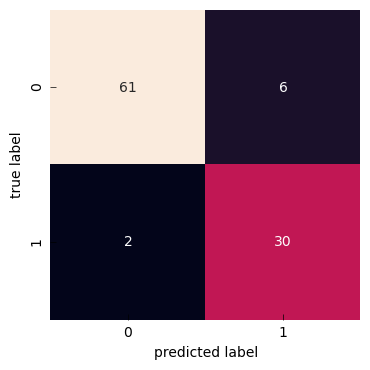

In [118]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

mat = confusion_matrix(yTest, yPred)

sns.heatmap(mat, square=True, annot=True ,cbar=False)
plt.ylabel('true label')
plt.xlabel('predicted label')

## <a id="praMis"> b) Common Problems </a> 

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>

* Indices 

see above

* Groupby outputs

In [119]:
new = features.groupby(["age","sex"])["G1","G2"].mean()

In [120]:
new

G1         G2
age sex                      
15  F    10.052632   9.789474
    M    12.250000  12.727273
16  F    10.203704  10.722222
    M    11.740000  11.680000
17  F    11.103448  10.879310
    M    10.600000   9.900000
18  F    10.883721   9.976744
    M    10.538462  10.307692
19  F    10.642857   9.714286
    M     9.700000   8.600000
20  F    15.000000  14.000000
    M    13.000000  13.500000
21  M    10.000000   8.000000
22  M     6.000000   8.000000

In [121]:
new.index

MultiIndex(levels=[[15, 16, 17, 18, 19, 20, 21, 22], ['F', 'M']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 7], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1]],
           names=['age', 'sex'])

* Formatting

notably when loading sparse matrices or data with text

In [122]:
ex = pd.DataFrame( [['A' , 1 , 3.2, 3.2 ],['A' , 6 , 4.2, 1 ],['B' , 2 , 8, 1 ]] )
ex

,0,1,2,3
0,A,1,3.2,3.2
1,A,6,4.2,1.0
2,B,2,8.0,1.0


In [123]:
ex.loc[0,0]

'A'

In [124]:
ex.loc[0,1]

1

In [125]:
type(ex.loc[0,1])

numpy.int64

In [126]:
type(ex.loc[0,2])

numpy.float64

## <a id="praCla"> c) ML with missing values </a> 

<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>

The problem of classfication is to find rules for assigning a class to a given vector from already classified data, for instance, the points below:

[[ 10.28916804  -2.29597807  11.8623534 ]
 [ -3.0713799    0.84458636  -0.78241846]
 [-10.09445518  -7.57447551   2.71184105]
 [  3.48034722  -0.67859451  -6.33583952]
 [  6.73068886  -2.17130117   5.01024363]] [0 2 1 2 0]


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


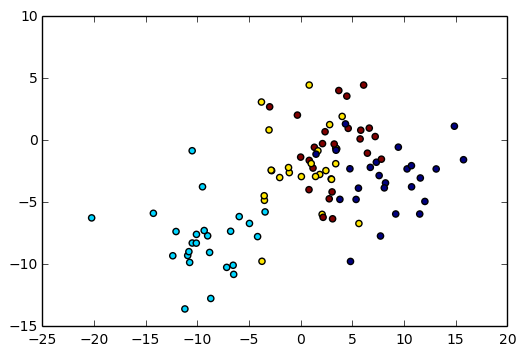

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

# we create 100 separable points in R^3 around 4 centers
X, y = make_blobs(n_samples=100, n_features=3, centers=4 ,cluster_std = 3.0, random_state=6)

print(X[:5,:],y[:5]) # print the first 5 points and labels

plt.scatter(X[:, 0], X[:, 1], c=y);

Support Vector Machines (SVM) are based on learning a vector $w$ and an intercept $b$ such that the hyperplane $w^T x - b = 0$ separates the data i.e.  $a$ belongs to one class if  $w^T a - b > 0$ and the other elsewhere. 


The ``scikit-learn`` library provides a classification module:

In [128]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X,y)

In [129]:
clf.score(X,y)

1.0

So, the problem is actually easy. Let's make it more complicated.

In [130]:
# we create 100 separable points in R^3 around 4 centers
X1, y1 = make_blobs(n_samples=30, n_features=3, centers=10 ,cluster_std = 3.0, random_state=6)
X2, y2 = make_blobs(n_samples=1000, n_features=3, centers=2 ,cluster_std = 3.0, random_state=6)

X = np.vstack((X1,X2))
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if np.random.rand() > 0.2:
            X[i,j]=np.nan
y = np.concatenate((y1,y2+10))

In [131]:
data = pd.concat([ pd.DataFrame(X) , pd.DataFrame(y)],axis= 1)
data.columns=[ "f1","f2","f3","class"]
data

,f1,f2,f3,class
0,NaN,NaN,NaN,8
1,NaN,-1.476811,NaN,9
2,NaN,NaN,NaN,0
3,NaN,NaN,NaN,5
4,NaN,NaN,NaN,6
5,NaN,NaN,NaN,4
6,NaN,NaN,NaN,5
7,NaN,NaN,NaN,1
8,5.941581,NaN,NaN,7
9,NaN,NaN,NaN,2


In [132]:
X = data.drop("class",axis = 1)
y = pd.DataFrame(data["class"])

In [133]:
data.groupby("class").count()

,f1,f2,f3
class,,,
0,0,0,0
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,0
5,1,0,0
6,0,0,0
7,1,0,0
8,0,0,0


In [134]:
from sklearn.tree import DecisionTreeClassifier

try:
    clf = DecisionTreeClassifier().fit(X,y)
except Exception as e:
    print(e)

Input contains NaN, infinity or a value too large for dtype('float32').


In [135]:
clf = DecisionTreeClassifier().fit(X.fillna(0.0),y)

In [136]:
clf.score(X.fillna(0.0),y)

0.73009708737864076

Let's try to improve:
* are there empty examples ?

In [137]:
data.loc[:,:"f3"].isnull()

,f1,f2,f3
0,True,True,True
1,True,False,True
2,True,True,True
3,True,True,True
4,True,True,True
5,True,True,True
6,True,True,True
7,True,True,True
8,False,True,True
9,True,True,True


In [138]:
data.loc[:,:"f3"].isnull().all(axis = 1)

0        True
1       False
2        True
3        True
4        True
5        True
6        True
7        True
8       False
9        True
10      False
11      False
12       True
13      False
14       True
15       True
16       True
17       True
18       True
19      False
20       True
21       True
22       True
23       True
24       True
25       True
26      False
27       True
28       True
29       True
        ...  
1000    False
1001    False
1002    False
1003     True
1004     True
1005    False
1006     True
1007    False
1008     True
1009    False
1010    False
1011     True
1012     True
1013     True
1014     True
1015     True
1016     True
1017     True
1018    False
1019    False
1020    False
1021    False
1022    False
1023     True
1024     True
1025    False
1026     True
1027     True
1028    False
1029     True
Length: 1030, dtype: bool

What to do with that ? (we could filter...)

In [139]:
Nullex = data[data.loc[:,:"f3"].isnull().all(axis = 1)]
Nullex

,f1,f2,f3,class
0,NaN,NaN,NaN,8
2,NaN,NaN,NaN,0
3,NaN,NaN,NaN,5
4,NaN,NaN,NaN,6
5,NaN,NaN,NaN,4
6,NaN,NaN,NaN,5
7,NaN,NaN,NaN,1
9,NaN,NaN,NaN,2
12,NaN,NaN,NaN,1
14,NaN,NaN,NaN,6


In [140]:
data.drop(Nullex.index,inplace=True)

In [141]:
data.fillna(0.0,inplace=True)

In [142]:
data.groupby("class").count()

,f1,f2,f3
class,,,
1,1,1,1
2,1,1,1
3,1,1,1
5,1,1,1
7,1,1,1
9,2,2,2
10,245,245,245
11,239,239,239


In [143]:
X = data.drop("class",axis = 1)
y = pd.DataFrame(data["class"])

In [144]:
clf = DecisionTreeClassifier().fit(X,y)

In [145]:
clf.score(X,y)

1.0

* Here I fitted classes with only one example, so I'm probably overfitting, which show if I want a "not too complex" tree

In [146]:
clf = DecisionTreeClassifier(max_depth=2).fit(X,y)

In [147]:
clf.score(X,y)

0.6924643584521385

Let's drop the classes with less that 2 examples. (I'll also use groupby over another DataFrame)

In [148]:
def filter_small_class(x):
    if (x.count()>2).any(): return True
    else: return False

In [149]:
datafil = data.groupby("class").filter(filter_small_class)

In [150]:
datafil.groupby(y["class"]).count()

,f1,f2,f3,class
class,,,,
10,245,245,245,245
11,239,239,239,239


In [151]:
datafil.count()

f1       484
f2       484
f3       484
class    484
dtype: int64

In [152]:
data.count()

f1       491
f2       491
f3       491
class    491
dtype: int64

In [153]:
Xfil = datafil.drop("class",axis = 1)
yfil = pd.DataFrame(datafil["class"])

In [154]:
clf = DecisionTreeClassifier(max_depth=2).fit(Xfil,yfil)

In [155]:
clf.score(Xfil,yfil)

0.7024793388429752

In [156]:
clf.score(X,y)

0.6924643584521385

<br/><br/>


# ``4.  Exercises``

---

<div class="exo"> **Exercise 3.2.1:** Bots Discovery<br/><br/>


In the dataset <tt>ratings_bots.csv</tt>, some users may be bots. To help a movie sucess they add ratings (faborable ones often). To get a better recommendation, we try to remove them by

<ul>
<li> Deleting all users with a mean rating above 4.7/5 (nobody is that nice) and count them. <br/>
* **hint:** the [nunique](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.nunique.html)  function may be helpful to count*</li>
<li> Deteting multiples reviews of movie by a single user by replacing them with only the first one. As it is a strange behavior, add a column "potential_bot" with a boolean flag True for them and False for the other. What is the proportion of potential bots amongst the users? <br/> 
* **hint:** the <tt>groupby</tt> function can be applied to several columns, also <tt>reset_index(drop=True)</tt> removes the grouby indexing.* <br/> 
* **hint:** remember the <tt>loc</tt> function, e.g.  <tt>df.loc[df['userId'] == 128]</tt> returns a dataframe of the rows where the userId is 128; and <tt>df.loc[df['userId'] == 128].loc[samerev['movieId'] == 3825]</tt> returns a dataframe of the rows where the userId is 128 **and** the movieID is 3825.* <br/> 
* **hint:** 17 ratings have to be removed, for instance, user 128 has 3 ratings of the movie 3825.*</li>
</ul>

This dataset has around 100 000 ratings so hand picking won't do!

</div>

In [157]:
import pandas as pd
import numpy as np

ratings_bots = pd.read_csv('data/ml-small/ratings_bots.csv')

<div class="exo"> **Exercise 3.2.2:** Planets discovery <br/><br/>

We will use the Planets dataset, available via the [Seaborn package](http://seaborn.pydata.org/) (see further). It provides information on how astronomers found new planets around stars, *exoplanets*.


<ul>
<li>Diplay median, mean and quantile informations for these planets orbital periods, masses, and distances.</li>
<li>For each method, display statistic on the years planets were discovered using this technique.</li>
<li>Display a table giving the number of planets discovered by each methods in each decade (1980s to 2010s)<br/>
* **hint:** the decade can be obtained as series with <tt>10 (planets['year'] // 10)</tt> and this series can be used in a groupby operation on the dataframe even though it is not a column.*</li>
</ul>

</div>

In [158]:
import pandas as pd
import numpy as np

planets = pd.read_csv('data/planets.csv')
print(planets.shape)
planets.head()

(1035, 6)


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


---
<div id="style"></div>
### Package Check and Styling


<p style="text-align: right; font-size: 10px;"><a href="#top">Go to top</a></p>


In [159]:
import lib.notebook_setting as nbs

packageList = ['numpy', 'matplotlib', 'pandas', 'seaborn', 'sklearn']
nbs.packageCheck(packageList)

nbs.cssStyling()

[Python version] 	3.4.3 (default, Nov 12 2018, 22:25:49) 
[GCC 4.8.4]

[Packages versions]

numpy               :	1.13.1
matplotlib          :	1.3.1
pandas              :	0.20.3
seaborn             :	0.8.0
sklearn             :	0.18.1
